# 19 Web data
File(s) needed: 

If you are looking for more info on getting data from Web pages, consider this book:
```
"Web Scraping with Python: Collecting Data From the Modern Web" by Ryan Mitchell.
ISBN: 978-1-491-91029-0 (First edition - there is a second edition out now)
Publisher: O'Reilly.
```

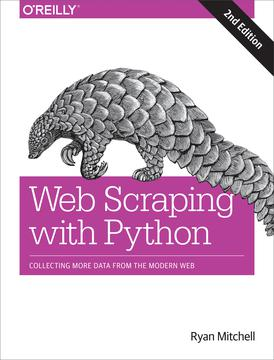

Online version available at https://www.oreilly.com/library/view/web-scraping-with/9781491985564/

Printed copy is available wherever fine books are sold.

There are many other good references available out there, too. Please share if you find one you feel is especially useful.

---

There are many ways we can get data from Web pages. We will talk a little about web scraping and using APIs to give you an introduction to both topics. 

## Web scraping
Anyone who has done any work on a Web page knows how HTML is structured. Web scraping takes advantage of the structure used to build Web pages in order to extract their parts.

We need two main tools to be able to do that:
- a way to open and read Web pages
- a way to make sense of their contents

### Open and read Web pages

Python has a standard library called "urllib" we will use to make the connection to Web pages and read their contents.

More on it is available at https://docs.python.org/3/library/urllib.html

We will use the `urlopen` function from the `request` module. When we use the `read()` method, we get the HTML contents of a Web page. In the example below, we will get the contents from a small Web page. Look at the page separatley in a browser to see what will be scraped.

In [3]:
from urllib.request import urlopen

In [2]:
html = urlopen("http://pythonscraping.com/pages/page1.html").read()
print(html)

NameError: name 'urlopen' is not defined

Let's do the same thing with the UCA MIS Faculty & Staff page.

In [4]:
mis_page = urlopen("http://uca.edu/mis/facultystaff/").read()
print(mis_page)

b'\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US" xml:lang="en-US">\n<head profile="http://gmpg.org/xfn/11">\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<title>Faculty and Staff \xe2\x80\x94 Management Information Systems</title><title>Faculty and Staff - Management Information Systems</title><meta property="twitter:account_id" content="17534813" /><meta name="twitter:card" content="summary" /><meta name="twitter:site" content="@ucabears" /><meta name="twitter:title" content="University of Central Arkansas | UCA" /><meta name="twitter:description" content="Academic excellence, a vibrant campus, D1 athletics and an energetic college town, all help prepare our students for success here and everywhere else." /><meta name="twitter:image" content="https://c2.staticflickr.com/2/1632/buddyicons/37331606@N05_r.jpg" /><meta name="PageId

### Make sense of the contents
That is interesting but not very useful. We need another tool to help us make sense of the pages we read and that allows us to extract the contents. We could write the code to do that, but there is a popular library called Beautiful Soup that can do it for us.

Beautiful Soup is not part of standard Python but it is included in the Anaconda distribution. We just need to import it into our code to use it.

Let's take a look at the documentation for Beautiful Soup:  https://www.crummy.com/software/BeautifulSoup/


In [ ]:
# Bring the BS functionality into our program.
from bs4 import BeautifulSoup

We have to specify a parser when we use BS. We will use the `lxml` parser recommended in the BS documentation. The call to BeautifulSoup will return a BeautifulSoup object, which contains the entire parsed Web page. We can access different parts of the parsed page by referring to HTML tag names. In the example below, we print only the "h1" tagged items from the previously read page.

In [ ]:
bsObj = BeautifulSoup(html, "lxml")
print(bsObj.h1)

In [ ]:
# Turn the Beautiful Soup object into a formatted tree for "pretty printing"
# It makes the results easier to read.
print(bsObj.prettify())


In [ ]:
# We can use the findAll method to get every tag that lists faculty thumbnail pictures.
# Adding the prettify() method makes it a little easier to read.
bsObj2 = BeautifulSoup(mis_page, "lxml")
pic_list = bsObj2.findAll("div", {"class":"fs_thumb_image"})

for name in pic_list:
    print(name.prettify())
    #print()

In [ ]:
# Print the first link tag contents.
print(bsObj2.link.prettify())

In [ ]:
# everything on the MIS F&S page with an image tag
src_list = bsObj2.findAll("img")
for name in src_list:
    print(name.prettify())

### Example: Yahoo Finance
Go to finance.yahoo.com and search for stock data on a publicly traded company.

Look at the way the data is structured. Look at the underlying HTML code.

Python's `json` library turns JSON objects into dictionaries.

JSON = JavaScript Object Notation.  https://www.json.org/

JSON has become one of the standard ways data is represented on the Internet. Thakns to the tools we have available to us, we don't need to be JSON experts to make use of it. The Python `json` library puts a great deal of functionality at our fingertips. This example makes use of that functionality.

Let's look at the code before each of us runs it with a different stock ticker symbol.

In [5]:
# Example: scraping company stock data from Yahoo Finance
# Source for original code: https://www.scrapehero.com/scrape-yahoo-finance-stock-market-data/
from lxml import html  
import requests
from time import sleep
import json
from collections import OrderedDict
from time import sleep

def parse(ticker):
    url = "http://finance.yahoo.com/quote/%s?p=%s"%(ticker,ticker)
    #response = requests.get(url, verify=False)
    response = requests.get(url, verify=True)    
    print ("Parsing %s"%(url))
    sleep(4)
    parser = html.fromstring(response.text)
    summary_table = parser.xpath('//div[contains(@data-test,"summary-table")]//tr')
    summary_data = OrderedDict()
    other_details_json_link = "https://query2.finance.yahoo.com/v10/finance/quoteSummary/{0}?formatted=true&lang=en-US&region=US&modules=summaryProfile%2CfinancialData%2CrecommendationTrend%2CupgradeDowngradeHistory%2Cearnings%2CdefaultKeyStatistics%2CcalendarEvents&corsDomain=finance.yahoo.com".format(ticker)
    summary_json_response = requests.get(other_details_json_link)
    try:
        json_loaded_summary =  json.loads(summary_json_response.text)
        y_Target_Est = json_loaded_summary["quoteSummary"]["result"][0]["financialData"]["targetMeanPrice"]['raw']
        earnings_list = json_loaded_summary["quoteSummary"]["result"][0]["calendarEvents"]['earnings']
        eps = json_loaded_summary["quoteSummary"]["result"][0]["defaultKeyStatistics"]["trailingEps"]['raw']
        datelist = []
        for i in earnings_list['earningsDate']:
            datelist.append(i['fmt'])
        earnings_date = ' to '.join(datelist)
        for table_data in summary_table:
            raw_table_key = table_data.xpath('.//td[contains(@class,"C(black)")]//text()')
            raw_table_value = table_data.xpath('.//td[contains(@class,"Ta(end)")]//text()')
            table_key = ''.join(raw_table_key).strip()
            table_value = ''.join(raw_table_value).strip()
            summary_data.update({table_key:table_value})
        summary_data.update({'1y Target Est':y_Target_Est,'EPS (TTM)':eps,'Earnings Date':earnings_date,'ticker':ticker,'url':url})
        return summary_data
    except:
        print ("Failed to parse json response")
        return {"error":"Failed to parse json response"}

if __name__=="__main__":
    # THIS IS WHERE YOU ENTER THE TICKER SYMBOL YOU WANT TO FIND *************
    ticker = 'T'
    # ************************************************************************
    
    print ("Fetching data for %s"%(ticker))
    scraped_data = parse(ticker)
    print ("Writing data to output file")
    with open('%s-summary.json'%(ticker),'w') as fp:
        json.dump(scraped_data,fp,indent = 4)

Fetching data for T
Parsing http://finance.yahoo.com/quote/T?p=T
Writing data to output file


## APIs
APIs are application programming interfaces. They provide a structured way the owner of a Web site has provided to allow access to data on their site. Data is typically returned to the requesting programmer in XML or JSON format. JSON is quickly becoming the default encoding protocol for two reasons.
1. JSON files are usually smaller than XML files.
2. Newer server-side technologies find JSON easier to use.

APIs use the HTTP protocol just like regular websites. What makes them different is that they follow a very standardized syntax and return data in JSON or XML instead of HTML.

If you decide to explore APIs, be sure to read the documentation of every API you use. While the rules surrounding APIs are very standardized, indiviual APIs may have its own quirks.

## Methods
APIs make use of four methods to request data from a web server using the HTTP protocol:
- GET
    - This is the method you use when you make a call through the address bar in the browser.
    - A request for information.
- POST
    - Used when you submit info or fill out a form online.
    - Use it to login, with username and password.
    - A request to store info on the server database.
- PUT
    - Not as common with websites but may be used with an API.
    - It is an update request.
- DELETE
    - Deletes info from the database.
    - For obvious reasons it is not often available through public APIs.

## Authentication
Some APIs don't require authentication. That means anybody can make a call to the API for free and without registering. The requirement for at least registering with the API before you are allowed to access it is become increasingly common. Authentication generally relies on a _token_ to identify the registered user making the API call. The token is a character string that is typically added to the request code.

Of course most of the more interesting APIs require you to register and use a token in order to access any of their data.

Example: Google APIs
https://developers.google.com/products/

Look at Analytics, Maps, GMail